# Matplotlib

There are many data viz packages in the Python universe, but Matplotlib is the granddaddy of them all.  The following is a beginner to intermediate level walkthrough on Matplotlib.  

The main goal of this notebook is to introduce the Matplotlib APIs and various types of visualizations that can be made with Matplotlib.  By the end of this notebook, you should have more than enough to get started with making whatever visualizations you need.  This is NOT meant to be a guide for data visualization best practices.

Matplotlib comes installed with Anaconda distribution's base environment, so it could be useful when you're on a network where you can't install new packages.  Many newer packages, such as seaborn, build off of Matplotlib to make coding simpler and to make aesthetics more modern, but at times it is necessary to use Matplotlib to customize these visualizations to your liking.

With that, let's get started with learning about how to use Matplotlib!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents

This is post is split this up into the following sections:

   1. [Anatomy of Matplotlib](#Anatomy-of-Matplotlib)
   2. [Object-oriented vs. pyplot interface](#Object-oriented-vs.-pyplot-interface)
   3. [Single Variable Viz (Histograms/density plots)](#Single-Variable-Viz-(Histograms/density-plots))
   4. [Multi-variable Viz (Scatter/line/bar plots)](#Multi-variable-Viz-(Scatter/line/bar-plots))
   5. [Customizing Plots](#Customizing-Plots)
   6. [Three-Dimensional Plotting](#Three-Dimensional-Plotting)
   7. [APIs](#APIs)
   8. [Styling](#Styling)
   9. [Summary](#Summary)

This notebook just scratches the surface and I recommend further training if you are interested in mastering Matplotlib more.  The [Matplotlib documentation](https://matplotlib.org/stable/contents.html) is extensive and their website even includes a "gallery" that is very useful for finding sample code for almost any type of visualization.

## Anatomy of Matplotlib

In Matplotlib, a plot is a hierarchy of nested Python objects. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

A `Figure` object is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and `Figure`s can contain multiple `Axes`.

Most plotting occurs on an `Axes`. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an `Axes` with a call to `subplot` (which places `Axes` on a regular grid), so in most cases, `Axes` and `Subplot` are synonymous.

`Axes` may be a confusing name because it actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).  However, the name makes sense because each `Axes` object has corresponding `XAxis` and `YAxis` objects. These contain the ticks, tick locations, labels, etc. In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual `Axis` part of things all that much. However, it is worth mentioning here to explain where the term `Axes` comes from.

![matplot_anatomy](matplotlib-plot-anatomy.png)

We'll demonstrate working more with customizing the `Figure` and `Axes` attributes in the [Customizing Plots section.](#Customizing-Plots)

For now we'll actually get into the code and make some plots, starting with a single variable.

## Object-oriented vs. `pyplot` interface

There are essentially two ways to use Matplotlib:
   1. Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style") to do plotting.
   2. Rely on `pyplot` to automatically create and manage the figures and axes, and use `pyplot` functions for plotting.

Just about all methods of an `Axes` object exist as a function in the `pyplot` module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, `pyplot` calls `ax.set_xlim(1, 10)` on whichever `Axes` is "current".

So one can make a plot like this in OO-style:

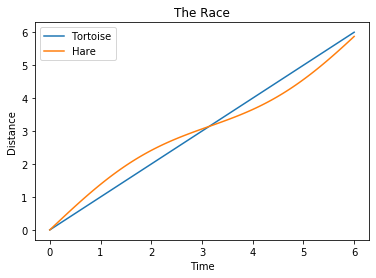

In [2]:
## Some data to plot
x = np.linspace(0, 6, 100)

# Note that in the OO-style, we use figure and axes objects.
fig, ax = plt.subplots()  # `subplot` returns figure and axes objects. See note below for more info.
ax.plot(x, x, label='Tortoise')  # Plot some data on the axes.
ax.plot(x, (x + np.sin(x)/2.2), label='Hare')  # Plot more data on the axes...
ax.set_xlabel('Time')  # Add an x-label to the axes.
ax.set_ylabel('Distance')  # Add a y-label to the axes.
ax.set_title("The Race")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

<sub><sup>Note: One nice thing about `plt.subplots()` used above is that when it's called with no arguments, it creates a new figure with a single subplot.  This is cleaner than the alternative of the following separate calls for a *Figure* using  `fig = plt.figure()` and *Axes* using `ax = fig.add_subplot(111)`.  So even in the OO-style, you're using `pyplot` to get your objects.</sup></sub>

Or like this `pyplot` style:

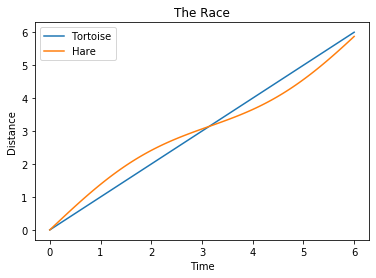

In [3]:
plt.plot(x, x, label='Tortoise')  # Plot some data on the (implicit) axes.
plt.plot(x, (x + np.sin(x)/2.2), label='Hare')  # etc.
plt.xlabel('Time') # x axis label
plt.ylabel('Distance') # y axis label
plt.title("The Race")
plt.legend()
plt.show()

You may be thinking, **"But which interface should I use?"**. Matplotlib's documentation suggests: "In general, it's suggested to restrict `pyplot` to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project)."

However, official Python style guides suggest: "Explicit is better than implicit".  And for that reason, the OO approach is preferred by many.

While very simple plots, with short scripts would benefit from the conciseness of the `pyplot` implicit approach, when doing more complicated plots (especially those with multiple `Axes`), or working within larger scripts, you will want to explicitly pass around the `Axes` and/or `Figure` object to operate upon.

OK - now that's enough talking about the vocab and APIs.  On to visualizations.

## Single Variable Viz (Histograms/density plots)

A simple histogram can be a great first step in understanding the features in a dataset.  Understanding how variables are distributed will inform later analysis and can quickly reveal outliers.

We'll start by using `plt.hist()` by default and customize it from there.

In [4]:
%matplotlib inline

<sub><sup>**NOTE:** This bit of "magic" above is a way to tell Jupyter how we want the plots to be rendered.  `inline` is actually the default in Python 3.7+ notebooks, but other options include `%matplotlib notebook`, which gives an interactive window that you can use to resize plots.  I personally prefer the aesthetic of simple inline images, but it requires that plot sizes be specified and using `plt.show()` to show the plot.</sup></sub>

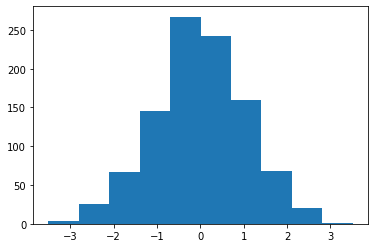

In [5]:
data = np.random.randn(1000) ## make some random normally distributed data
plt.hist(data)
plt.show()

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram.  Choosing an appropriate number of `bins` requires a bit of experimenting.

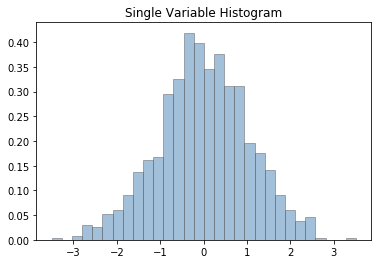

In [21]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         color='steelblue',
         edgecolor='#636363', ## Hex color
         linewidth = 1
        )
plt.title('Single Variable Histogram')
plt.show()

The `plt.hist` docstring has more information on other customization options available. I find adding some transparency `alpha` and `density=True` to be very useful when comparing histograms of several distributions with varying sample sizes.

<sub><sup>**NOTE:** From the docstring, `density=True` normalizes counts to form a probability density (i.e. the area (or integral) under the histogram will sum to 1).</sup></sub>

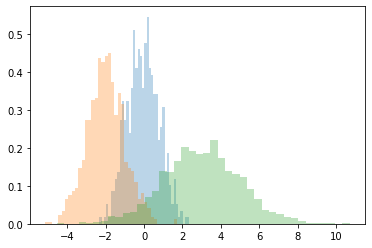

In [20]:
x1 = np.random.normal(0, 0.8, 500)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 2000)

kwargs = dict(alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

## Multi-variable Viz (Scatter/line/bar plots)

## Customizing Plots

In [ ]:
fig = plt.figure(facecolor=(1, 0, 0, 0.5))   # red background to see where the figure is
plt.title('Test Plot') ## Main title appears in the 'figure' area
plt.text(0.5, 0.5, "This is the 'subplot' or 'Axes' area.",
        fontsize=18, ha='center') ## text appears within the subplot/axes
plt.show()

In [ ]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0), facecolor=(1, 0, 0, .1))
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()


In [ ]:
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')
plt.show()


## Three-Dimensional Plotting

## APIs

## Summary
